In [760]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


In [761]:
# ---------------------------------------------------------------------------
# -----------------------------------SETTINGS--------------------------------
# ---------------------------------------------------------------------------
# Change the path_no, speed_no and angle to select which set of data you want to visualise.
# When visualising tests where there was NO wind, set the speed_no to 0, and angle to None, otherwise the code will throw an error. 
# PRETTY GOOD ONE 1/2/2/180 BEST WIND and 90

# Combine the same segments in one plot. change the aove 360, -720

# 1/2/3/180 has 450
charging_station_no = 1
path_no = 5
speed_no = 2
angle = 0

plt.rcParams['figure.figsize'] = [7, 7]

# ANGLES:
# 0 = Global North Wind
# 90 = Global Cross Wind
# 180 = Global South Wind

# Change according to your directory path:
parent_folder = "/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/flying"

# This is to select any test with any wind speed, path, or angle.
dataE3 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E3.csv")
dataE5 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E5.csv")
dataE7 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E7.csv")

# Changing milliseconds to seconds.
dataE3["time.ms"] = dataE3["time.ms"].map(lambda x : x/1000)
dataE5["time.ms"] = dataE5["time.ms"].map(lambda x : x/1000)
dataE7["time.ms"] = dataE7["time.ms"].map(lambda x : x/1000)

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------------------------------------------
# # -----------------------COMPARISON DATA FRAMES----------------------------
# ---------------------------------------------------------------------------

# ------------------------------------
# -------No-wind variants:------------
# ------------------------------------
dataE3_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E3.csv")
dataE3_no_wind["time.ms"] = dataE3_no_wind["time.ms"].map(lambda x : x/1000)

dataE5_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E5.csv")
dataE5_no_wind["time.ms"] = dataE5_no_wind["time.ms"].map(lambda x : x/1000)

dataE7_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E7.csv")
dataE7_no_wind["time.ms"] = dataE7_no_wind["time.ms"].map(lambda x : x/1000)

# ------------------------------------
# -------Wind speed 1 variant----------
# ------------------------------------
dataE3_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E3.csv")
dataE3_wind1["time.ms"] = dataE3_wind1["time.ms"].map(lambda x : x/1000)
print(dataE3_wind1)

dataE5_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E5.csv")
dataE5_wind1["time.ms"] = dataE5_wind1["time.ms"].map(lambda x : x/1000)

dataE7_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E7.csv")
dataE7_wind1["time.ms"] = dataE7_wind1["time.ms"].map(lambda x : x/1000)

# ------------------------------------
# ------Wind speed 2 variant----------
# ------------------------------------
dataE3_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E3.csv")
dataE3_wind2["time.ms"] = dataE3_wind2["time.ms"].map(lambda x : x/1000)

dataE5_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E5.csv")
dataE5_wind2["time.ms"] = dataE5_wind2["time.ms"].map(lambda x : x/1000)

dataE7_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E7.csv")
dataE7_wind2["time.ms"] = dataE7_wind2["time.ms"].map(lambda x : x/1000)



     Unnamed: 0  time.ms  stateEstimate.x  stateEstimate.y  stateEstimate.z  \
0             0      0.0         1.306206        -0.301475         0.001165   
1             1      0.1         1.306455        -0.301043         0.000941   
2             2      0.2         1.306361        -0.301264         0.001142   
3             3      0.3         1.306367        -0.301749         0.001133   
4             4      0.4         1.306298        -0.301389         0.001187   
..          ...      ...              ...              ...              ...   
974         974     97.4         0.807828         1.158345         0.000000   
975         975     97.5         0.807751         1.158410         0.000000   
976         976     97.6         0.807486         1.158397         0.000000   
977         977     97.7         0.807758         1.158577         0.000000   
978         978     97.8         0.807374         1.158343         0.000000   

     stabilizer.roll  stabilizer.pitch  stabilizer.

Text(0, 0.5, 'Voltage')

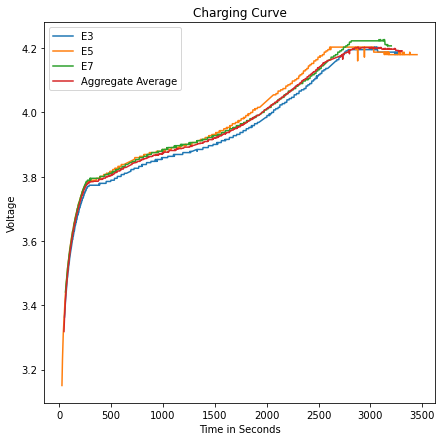

In [762]:
# ---------------------------------------------------------------------------
# ------------------------------CHARGING OVER TIME---------------------------
# ---------------------------------------------------------------------------


chargingE7 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE7.csv")
chargingE5 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/battery1.csv")
chargingE3 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE3.csv")

# Convert milliseconds to seconds:
chargingE3["time.ms"] = chargingE3["time.ms"].map(lambda x : x/1000)
chargingE5["time.ms"] = chargingE5["time.ms"].map(lambda x : x/1000)
chargingE7["time.ms"] = chargingE7["time.ms"].map(lambda x : x/1000)

# Plot three drone charging curves:
charginggraph = chargingE3.plot(x="time.ms", y="pm.vbat")
chargingE5.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
chargingE7.plot(x="time.ms", y ="pm.vbat", ax= charginggraph)

# Line of best fit from three charging curves:
aggregate_avg = {"pm.vbat": (chargingE3["pm.vbat"] + chargingE5["pm.vbat"] + chargingE7["pm.vbat"]).map(lambda x : x/3), 
            "time.ms": (chargingE7["time.ms"]+chargingE3["time.ms"]+chargingE5["time.ms"]).map(lambda x : x/3)} 
avg_charge_df = pd.DataFrame(aggregate_avg)
avg_charge_df.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
# batterygraph.set_xlim(0, None)

# Formatting:
charginggraph.legend(["E3","E5","E7","Aggregate Average"])
charginggraph.set_title("Charging Curve")
charginggraph.set_xlabel("Time in Seconds")
charginggraph.set_ylabel("Voltage")

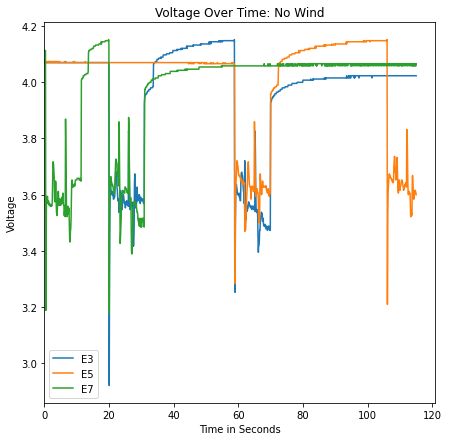

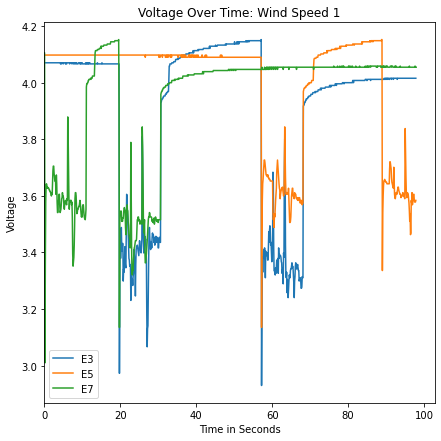

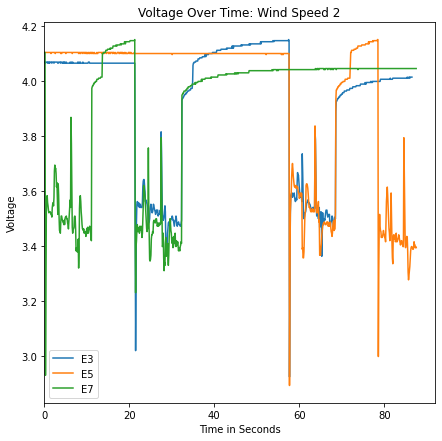

In [763]:
# ---------------------------------------------------------------------------
# ------------------------------BATTERY MAPPING------------------------------
# ---------------------------------------------------------------------------


# Graphing voltage over time.

# No Wind
batterygraph = dataE3_no_wind.plot(x="time.ms", y="pm.vbat")
dataE5_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE7_no_wind.plot(x="time.ms", y ="pm.vbat", ax= batterygraph)
batterygraph.set_xlim(0, None)
batterygraph.legend(["E3","E5","E7"])
batterygraph.set_title("Voltage Over Time: No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")


# Other syntax for plotting multiple graphs in one axes:
# fig = plt.figure()
# for frame in [dataE3, dataE5, dataE7]:
#     plt.plot(frame['time.ms'], frame['pm.vbat'])

plt.show()

# Wind Speed 1
batterygraph1 = dataE3_wind1.plot(x="time.ms", y="pm.vbat")
dataE5_wind1.plot(x="time.ms", y="pm.vbat", ax = batterygraph1)
dataE7_wind1.plot(x="time.ms", y ="pm.vbat", ax= batterygraph1)
batterygraph1.set_xlim(0, None)
batterygraph1.legend(["E3","E5","E7","relative wind direction"])
batterygraph1.set_title("Voltage Over Time: Wind Speed 1")
batterygraph1.set_xlabel("Time in Seconds")
batterygraph1.set_ylabel("Voltage")
# print(dataE3_wind1[int("time.ms")>15 and int("time.ms") < 30])
plt.show()

# Wind Speed 2
batterygraph2 = dataE3_wind2.plot(x="time.ms", y="pm.vbat")
dataE5_wind2.plot(x="time.ms", y="pm.vbat", ax = batterygraph2)
dataE7_wind2.plot(x="time.ms", y ="pm.vbat", ax= batterygraph2)
batterygraph2.set_xlim(0, None)
batterygraph2.legend(["E3","E5","E7"])
batterygraph2.set_title("Voltage Over Time: Wind Speed 2")
batterygraph2.set_xlabel("Time in Seconds")
batterygraph2.set_ylabel("Voltage")
plt.show()





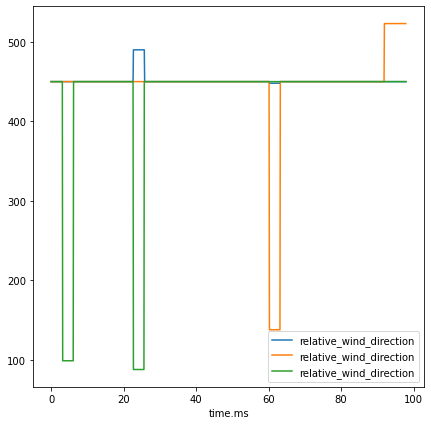

In [764]:
angle_plot = dataE3_wind1.plot(x="time.ms", y="relative_wind_direction")
dataE5_wind1.plot(x="time.ms", y="relative_wind_direction", ax = angle_plot)
dataE7_wind1.plot(x="time.ms", y="relative_wind_direction", ax = angle_plot)
plt.show()

Drone: E3
Angle: 0
With Wind Speed 1 Gradient: 1.863677391720173e-05
NO Wind Line Of Best Fit:0.00031759501907826127
With Wind Speed 2 Gradient: -0.0009487319859369141


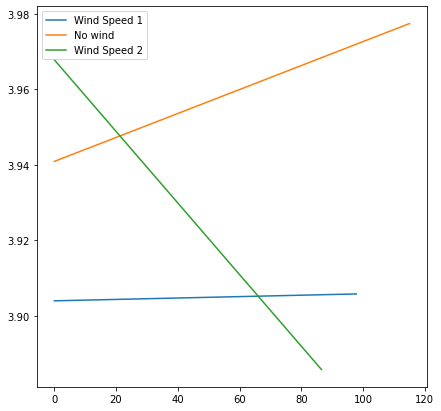

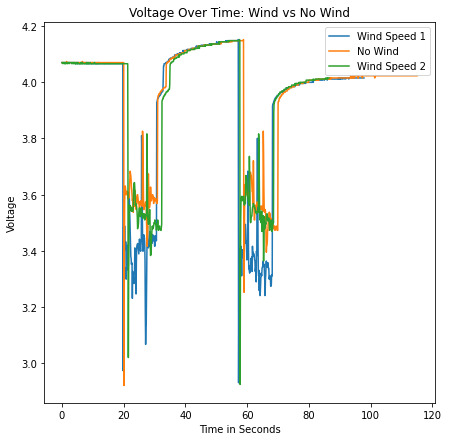

In [765]:
# ---------------------------------------------------------------------------
# --------------------COMPARING LINE OF BEST FIT OF VOLTAGE------------------
# ---------------------------------------------------------------------------
# Line of best fit: Voltage Comparisons of No Wind, Wind Speed 1, Wind Speed 2

# Do duplicates for Drone E5 and E7

# Line of best fit with NO Wind
print("Drone: E3")
print("Angle: "+str(angle))
# Line of best with Wind Speed 1.
m, b = np.polyfit(dataE3_wind1["time.ms"], dataE3_wind1["pm.vbat"], 1)
plt.plot(dataE3_wind1["time.ms"], m*dataE3_wind1["time.ms"]+b, label = "Wind Speed 1")

print("With Wind Speed 1 Gradient: "+str(m))

m1, b1 = np.polyfit(dataE3_no_wind["time.ms"], dataE3_no_wind["pm.vbat"], 1)
plt.plot(dataE3_no_wind["time.ms"], m1*dataE3_no_wind["time.ms"]+b1, label="No wind")
print("NO Wind Line Of Best Fit:"+str(m1))

# Line of best with Wind Speed 2.
m2, b2 = np.polyfit(dataE3_wind2["time.ms"], dataE3_wind2["pm.vbat"], 1)
plt.plot(dataE3_wind2["time.ms"], m2*dataE3_wind2["time.ms"]+b2, label = "Wind Speed 2")
print("With Wind Speed 2 Gradient: " + str(m2))

plt.legend()



# gradient_plot.legend(["With Wind","No Wind"])
# gradient_plot.set_title("Voltage Over Time: Gradient of Wind vs No Wind")
# gradient_plot.set_xlabel("Time in Seconds")
# gradient_plot.set_ylabel("Voltage")

# Voltage graphs:
batterygraph = dataE3_wind1.plot(x="time.ms", y="pm.vbat")
dataE3_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE3_wind2.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
# batterygraph.set_ylim(3.3, 3.8)
# batterygraph.set_xlim(15, 38)

batterygraph.legend(["Wind Speed 1","No Wind", "Wind Speed 2"])
batterygraph.set_title("Voltage Over Time: Wind vs No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

plt.show()


Drone: E5
Angle: 0
With Wind Speed 1 Gradient: -0.0032298233115157465
NO Wind Line Of Best Fit:-0.0014104380614086004
With Wind Speed 2 Gradient: -0.006540213979943272


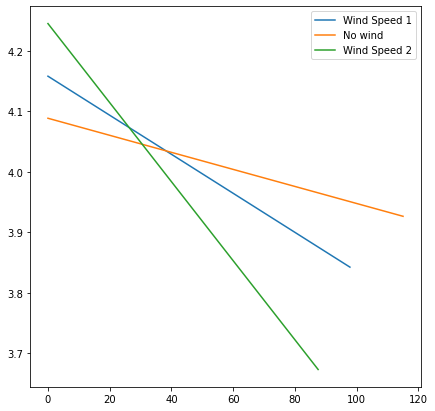

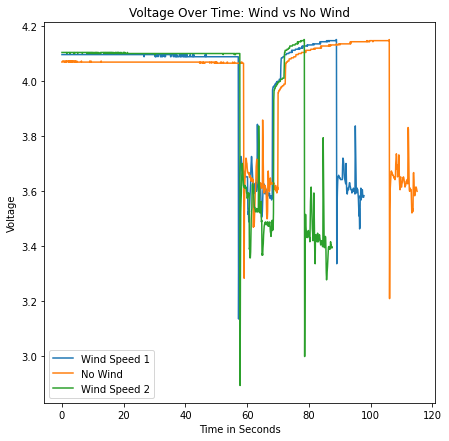

In [766]:
# Drone E5

# ---------------------------------------------------------------------------
# --------------------COMPARING LINE OF BEST FIT OF VOLTAGE------------------
# ---------------------------------------------------------------------------
# Line of best fit: Voltage Comparisons of No Wind, Wind Speed 1, Wind Speed 2

# Do duplicates for Drone E5 and E7

# Line of best fit with NO Wind
print("Drone: E5")
print("Angle: "+str(angle))
# Line of best with Wind Speed 1.
m, b = np.polyfit(dataE5_wind1["time.ms"], dataE5_wind1["pm.vbat"], 1)
plt.plot(dataE5_wind1["time.ms"], m*dataE5_wind1["time.ms"]+b, label = "Wind Speed 1")

print("With Wind Speed 1 Gradient: "+str(m))

m1, b1 = np.polyfit(dataE5_no_wind["time.ms"], dataE5_no_wind["pm.vbat"], 1)
plt.plot(dataE5_no_wind["time.ms"], m1*dataE5_no_wind["time.ms"]+b1, label="No wind")
print("NO Wind Line Of Best Fit:"+str(m1))

# Line of best with Wind Speed 2.
m2, b2 = np.polyfit(dataE5_wind2["time.ms"], dataE5_wind2["pm.vbat"], 1)
plt.plot(dataE5_wind2["time.ms"], m2*dataE5_wind2["time.ms"]+b2, label = "Wind Speed 2")
print("With Wind Speed 2 Gradient: " + str(m2))

plt.legend()



# gradient_plot.legend(["With Wind","No Wind"])
# gradient_plot.set_title("Voltage Over Time: Gradient of Wind vs No Wind")
# gradient_plot.set_xlabel("Time in Seconds")
# gradient_plot.set_ylabel("Voltage")

# Voltage graphs:
batterygraph = dataE5_wind1.plot(x="time.ms", y="pm.vbat")
dataE5_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE5_wind2.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
# batterygraph.set_ylim(3.3, 3.8)
# batterygraph.set_xlim(15, 38)

batterygraph.legend(["Wind Speed 1","No Wind", "Wind Speed 2"])
batterygraph.set_title("Voltage Over Time: Wind vs No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

plt.show()


Drone: E7
Angle: 0
With Wind Speed 1 Gradient: 0.004648378389299973
NO Wind Line Of Best Fit:0.0033990613622666994
With Wind Speed 2 Gradient: 0.0057866282644435454


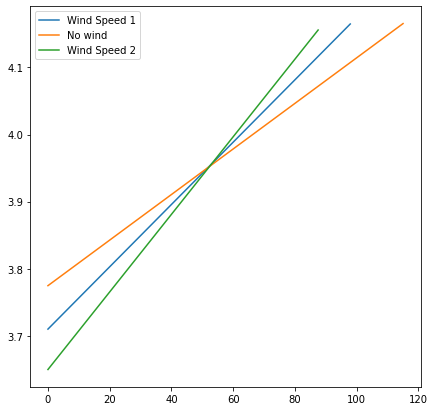

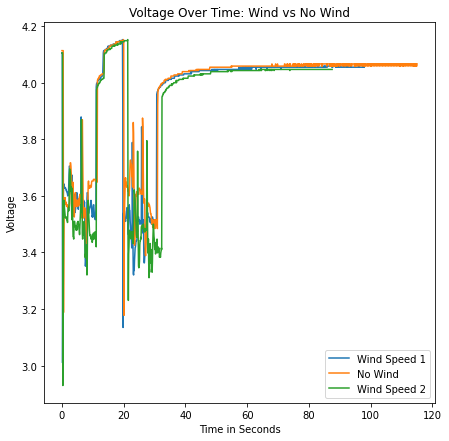

In [767]:
# Drone E7 Voltage over Time, Same Path and Angle, different Wind Speeds

# ---------------------------------------------------------------------------
# --------------------COMPARING LINE OF BEST FIT OF VOLTAGE------------------
# ---------------------------------------------------------------------------
# Line of best fit: Voltage Comparisons of No Wind, Wind Speed 1, Wind Speed 2

# Do duplicates for Drone E5 and E7

# Line of best fit with NO Wind
print("Drone: E7")
print("Angle: "+str(angle))
# Line of best with Wind Speed 1.
m, b = np.polyfit(dataE7_wind1["time.ms"], dataE7_wind1["pm.vbat"], 1)
plt.plot(dataE7_wind1["time.ms"], m*dataE7_wind1["time.ms"]+b, label = "Wind Speed 1")

print("With Wind Speed 1 Gradient: "+str(m))

m1, b1 = np.polyfit(dataE7_no_wind["time.ms"], dataE7_no_wind["pm.vbat"], 1)
plt.plot(dataE7_no_wind["time.ms"], m1*dataE7_no_wind["time.ms"]+b1, label="No wind")
print("NO Wind Line Of Best Fit:"+str(m1))

# Line of best with Wind Speed 2.
m2, b2 = np.polyfit(dataE7_wind2["time.ms"], dataE7_wind2["pm.vbat"], 1)
plt.plot(dataE7_wind2["time.ms"], m2*dataE7_wind2["time.ms"]+b2, label = "Wind Speed 2")
print("With Wind Speed 2 Gradient: " + str(m2))

plt.legend()



# gradient_plot.legend(["With Wind","No Wind"])
# gradient_plot.set_title("Voltage Over Time: Gradient of Wind vs No Wind")
# gradient_plot.set_xlabel("Time in Seconds")
# gradient_plot.set_ylabel("Voltage")

# Voltage graphs:
batterygraph = dataE7_wind1.plot(x="time.ms", y="pm.vbat")
dataE7_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE7_wind2.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
# batterygraph.set_ylim(3.3, 3.8)
# batterygraph.set_xlim(15, 38)

batterygraph.legend(["Wind Speed 1","No Wind", "Wind Speed 2"])
batterygraph.set_title("Voltage Over Time: Wind vs No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

plt.show()


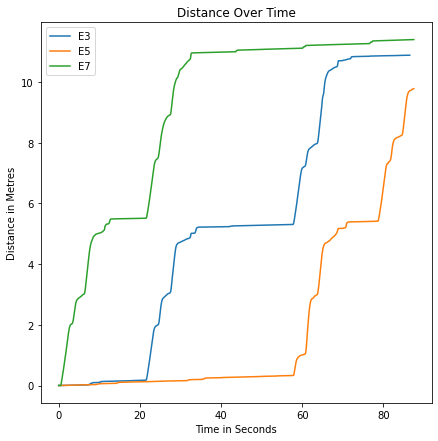

In [768]:
# ---------------------------------------------------------------------------
# -------------------------------DISTANCE MAPPING----------------------------
# ---------------------------------------------------------------------------

distancegraph = dataE3.plot(x="time.ms", y="travel_dist")
dataE5.plot(x="time.ms", y="travel_dist", ax = distancegraph)
dataE7.plot(x="time.ms", y="travel_dist", ax = distancegraph)
distancegraph.legend(["E3","E5","E7"])
distancegraph.set_title("Distance Over Time")
distancegraph.set_xlabel("Time in Seconds")
distancegraph.set_ylabel("Distance in Metres")
plt.show()

# How many seconds would it take to fully charge:
# First find the number of seconds:
# np.interp(3.7, time_data, volt_data)

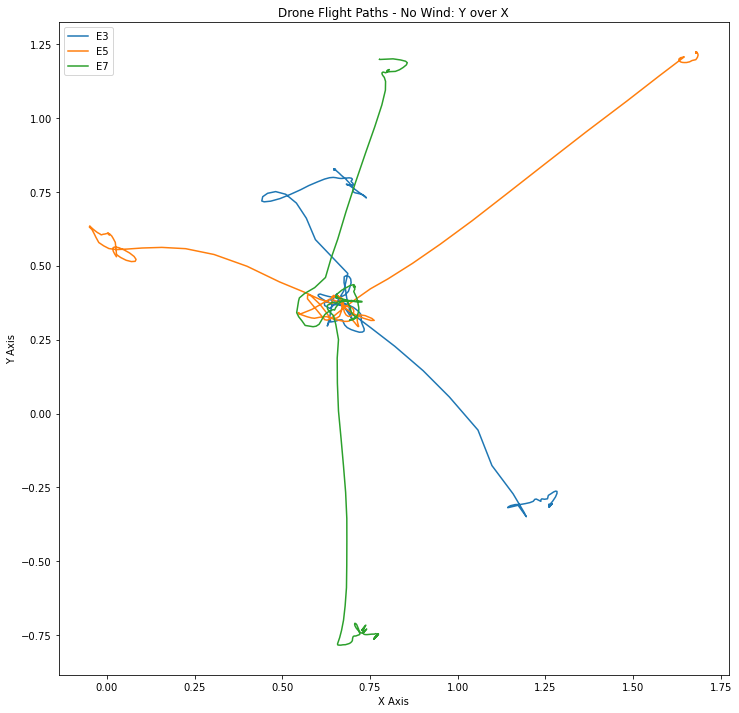

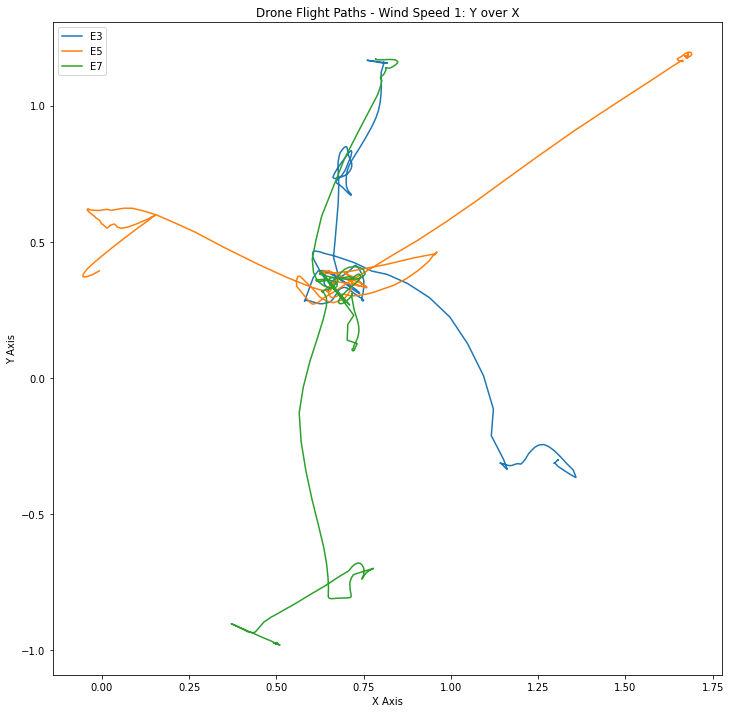

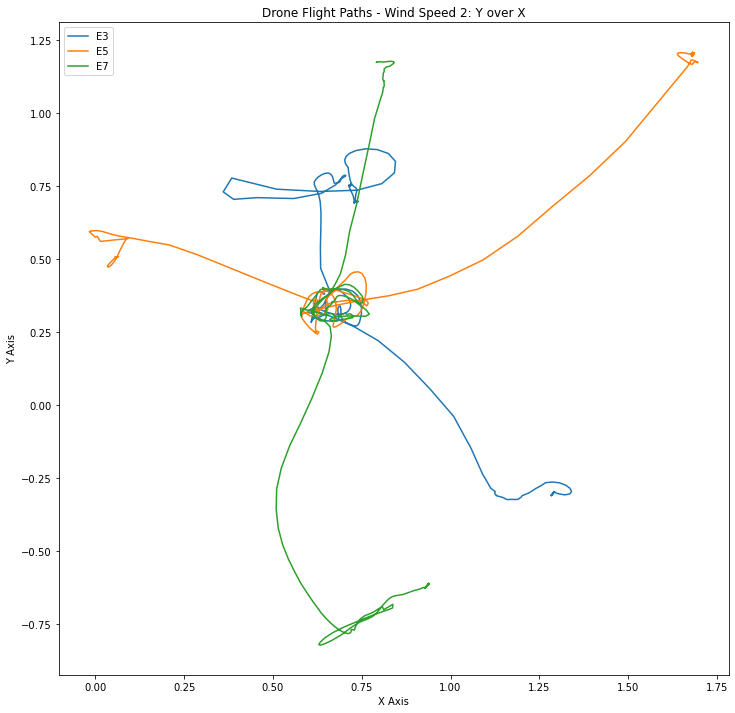

In [769]:
# ---------------------------------------------------------------------------
# ---------------------------X, Y COORDINATES MAPPING------------------------
# ---------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = [12, 12]

x_ycoord = dataE3_no_wind.plot(x="stateEstimate.x", y="stateEstimate.y")
dataE5_no_wind.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
dataE7_no_wind.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
x_ycoord.legend(["E3","E5","E7"])
x_ycoord.set_title("Drone Flight Paths - No Wind: Y over X")
x_ycoord.set_xlabel("X Axis")
x_ycoord.set_ylabel("Y Axis")
x_ycoord.figure.savefig('Path5_xy_nowind.png', facecolor='white', edgecolor='black')
plt.show()

x_ycoord1 = dataE3_wind1.plot(x="stateEstimate.x", y="stateEstimate.y")
dataE5_wind1.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord1)
dataE7_wind1.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord1)
x_ycoord1.legend(["E3","E5","E7"])
x_ycoord1.set_title("Drone Flight Paths - Wind Speed 1: Y over X")
x_ycoord1.set_xlabel("X Axis")
x_ycoord1.set_ylabel("Y Axis")
# x_ycoord1.figure.savefig('Path5_xy_wind1.png', facecolor='white', edgecolor='black')
plt.show()

x_ycoord2 = dataE3_wind2.plot(x="stateEstimate.x", y="stateEstimate.y")
dataE5_wind2.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord2)
dataE7_wind2.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord2)
x_ycoord2.legend(["E3","E5","E7"])
x_ycoord2.set_title("Drone Flight Paths - Wind Speed 2: Y over X")
x_ycoord2.set_xlabel("X Axis")
x_ycoord2.set_ylabel("Y Axis")
# x_ycoord2.figure.savefig('Path5_xy_wind2.png', facecolor='white', edgecolor='black')
plt.show()


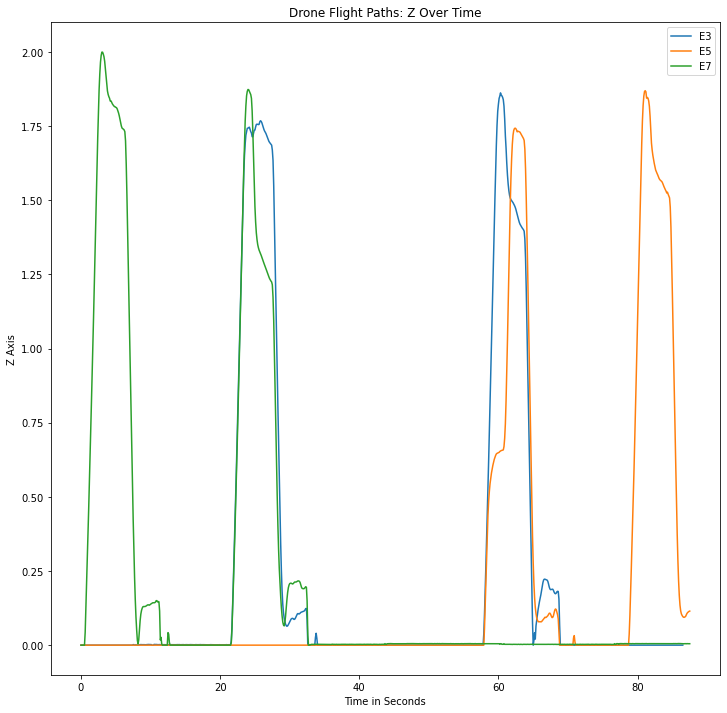

In [770]:
# ---------------------------------------------------------------------------
# ----------------------------Z COORDINATES MAPPING--------------------------
# ---------------------------------------------------------------------------

z_coord = dataE3.plot(x="time.ms", y="stateEstimate.z")
dataE5.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
dataE7.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
z_coord.legend(["E3","E5","E7"])
z_coord.set_title("Drone Flight Paths: Z Over Time")
z_coord.set_xlabel("Time in Seconds")
z_coord.set_ylabel("Z Axis")
plt.show()





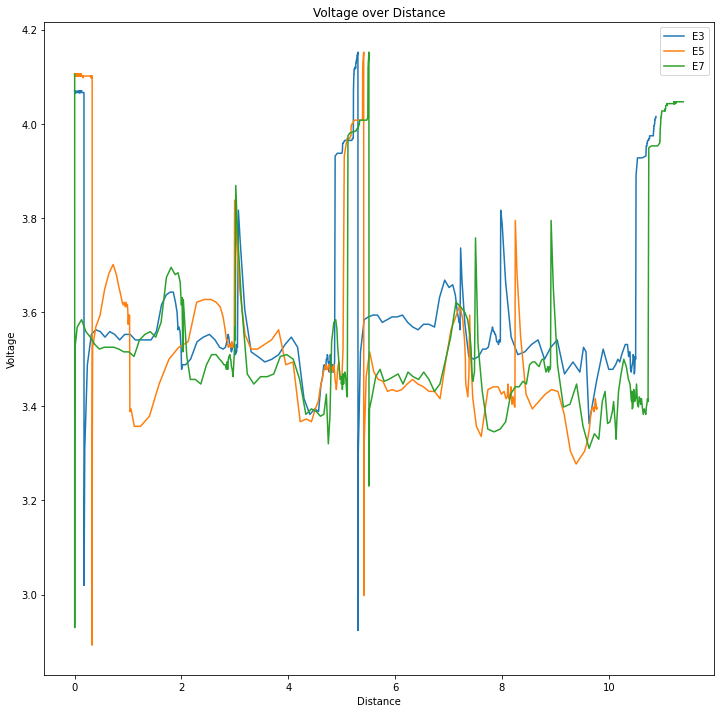

In [771]:
# ---------------------------------------------------------------------------
# ------------------------Voltage Change Over Distance-----------------------
# ---------------------------------------------------------------------------

distance_voltage = dataE3.plot(x="travel_dist", y="pm.vbat")
dataE5.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
dataE7.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
distance_voltage.legend(["E3","E5","E7"])
distance_voltage.set_title("Voltage over Distance")
distance_voltage.set_xlabel("Distance")
distance_voltage.set_ylabel("Voltage")

# Line of Best Fit:

# m2, b2 = np.polyfit(dataE3["travel_dist"], dataE3["pm.vbat"], 1)
# plt.plot(dataE3["travel_dist"], m2*dataE3["travel_dist"]+b2)
# print("Gradient E3:")
# print(m2)

# m3, b3 = np.polyfit(dataE5["travel_dist"], dataE5["pm.vbat"], 1)
# plt.plot(dataE5["travel_dist"], m3*dataE5["travel_dist"]+b3)
# print("Gradient E5:")
# print(m3)

plt.show()



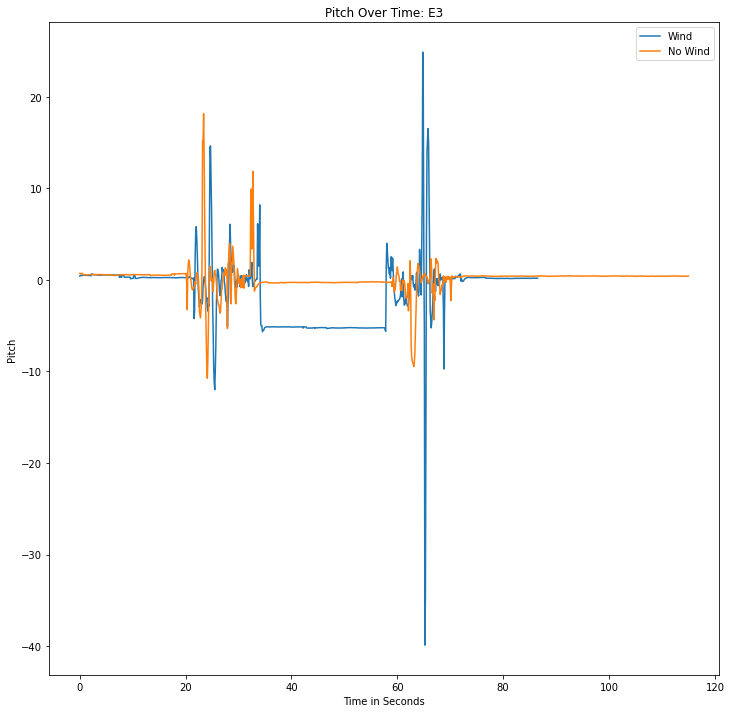

Standard Deviation of Drone E3 with Wind
3.7723259638308315
Standard Deviation of Drone E3 with NO Wind
1.6311385739739266


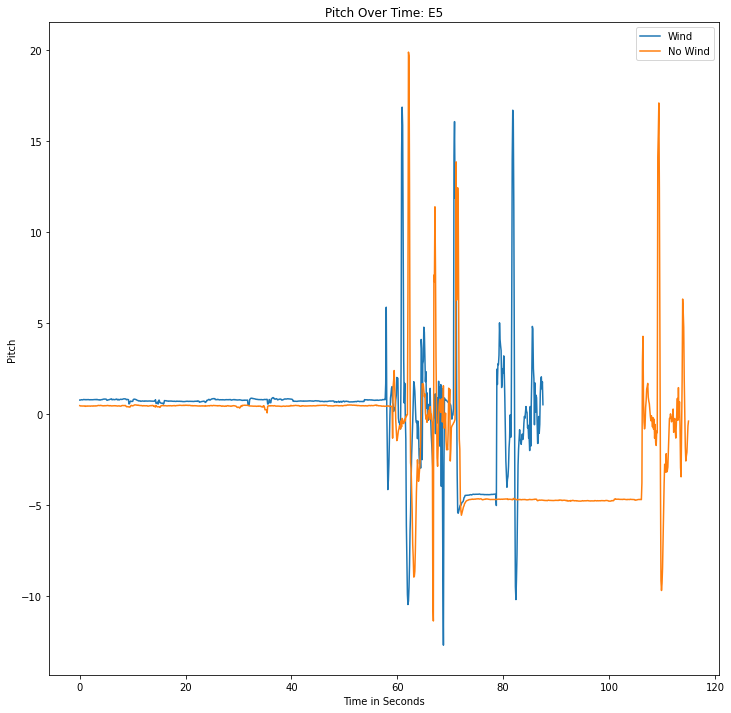

Standard Deviation of Drone E5 with Wind
2.7123469249567167
Standard Deviation of Drone E5 with NO Wind
3.0431775969572388


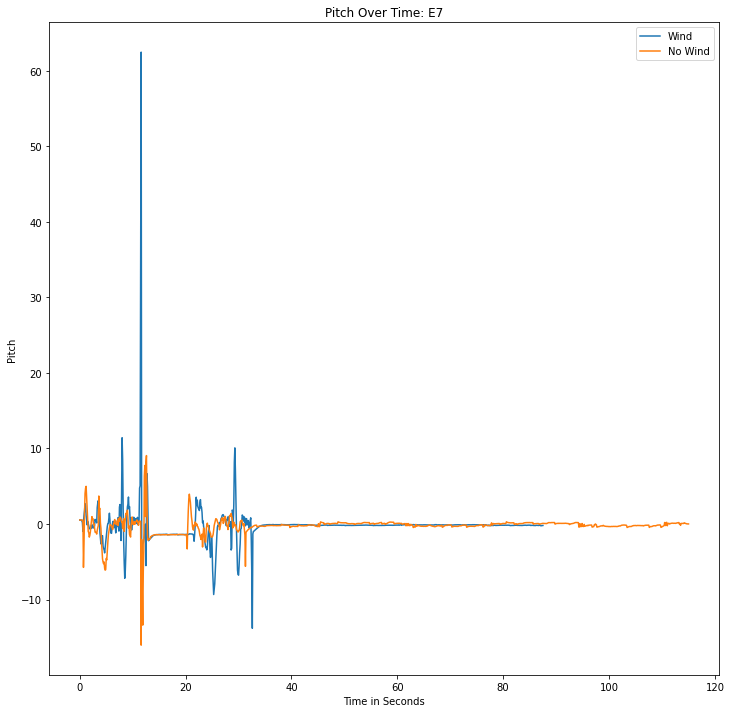

Standard Deviation of Drone E7 with Wind
2.8608785456833004
Standard Deviation of Drone E7 with NO Wind
1.1913207293209003


In [772]:
# ---------------------------------------------------------------------------
# --------------------------PITCH FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------


# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


pitch_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE3)
pitch_timeE3.legend(["Wind", "No Wind"])
pitch_timeE3.set_title("Pitch Over Time: E3")
pitch_timeE3.set_xlabel("Time in Seconds")
pitch_timeE3.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.pitch"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.pitch"].std())

# pitch_boxplot_E3 = dataE3.boxplot(column=["stabilizer.pitch"])
# pitch_bx = dataE3_no_wind.boxplot(column=["stabilizer.pitch"])

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

pitch_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE5)
pitch_timeE5.legend(["Wind", "No Wind"])
pitch_timeE5.set_title("Pitch Over Time: E5")
pitch_timeE5.set_xlabel("Time in Seconds")
pitch_timeE5.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.pitch"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.pitch"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------


pitch_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE7)
pitch_timeE7.legend(["Wind", "No Wind"])
pitch_timeE7.set_title("Pitch Over Time: E7")
pitch_timeE7.set_xlabel("Time in Seconds")
pitch_timeE7.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


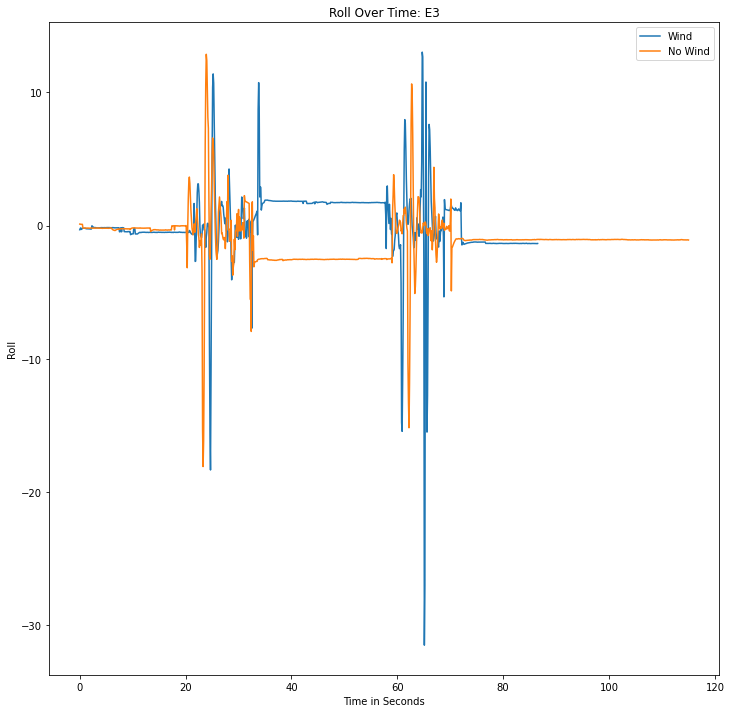

Standard Deviation of Drone E3 with Wind
2.7887401498293447
Standard Deviation of Drone E3 with NO Wind
1.9487464322486123


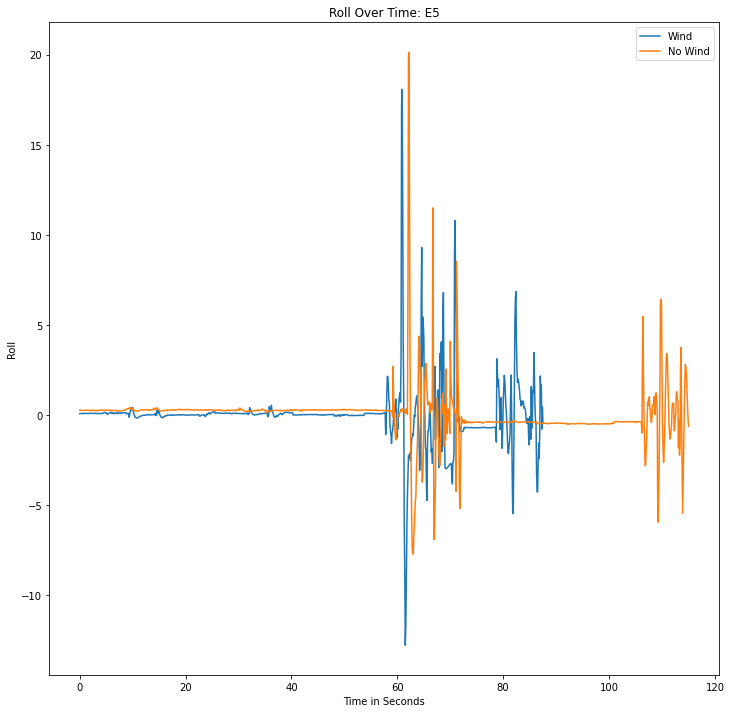

Standard Deviation of Drone E5 with Wind
1.7864195592205774
Standard Deviation of Drone E5 with NO Wind
1.5144582956236519


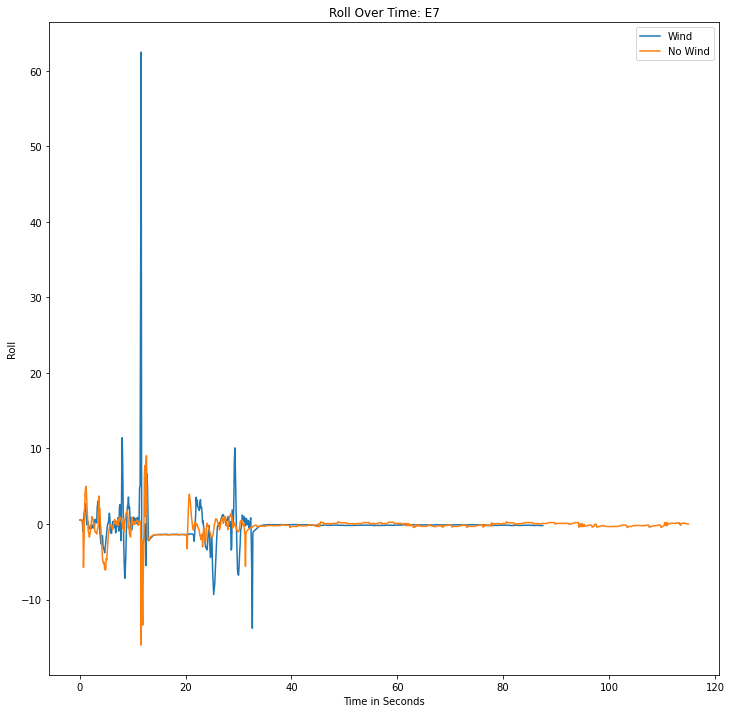

Standard Deviation of Drone E7 with Wind
2.8608785456833004
Standard Deviation of Drone E7 with NO Wind
1.1913207293209003


In [773]:
# ---------------------------------------------------------------------------
# --------------------------ROLL FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


roll_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.roll")
roll_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = roll_timeE3)
roll_timeE3.legend(["Wind", "No Wind"])
roll_timeE3.set_title("Roll Over Time: E3")
roll_timeE3.set_xlabel("Time in Seconds")
roll_timeE3.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.roll"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

roll_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.roll")
roll_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = roll_timeE5)
roll_timeE5.legend(["Wind", "No Wind"])
roll_timeE5.set_title("Roll Over Time: E5")
roll_timeE5.set_xlabel("Time in Seconds")
roll_timeE5.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.roll"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

roll_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
roll_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = roll_timeE7)
roll_timeE7.legend(["Wind", "No Wind"])
roll_timeE7.set_title("Roll Over Time: E7")
roll_timeE7.set_xlabel("Time in Seconds")
roll_timeE7.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


NOTE: Yaw does not necessarily indicate instability. It is a measurement of the drone turning parallel to the ground.


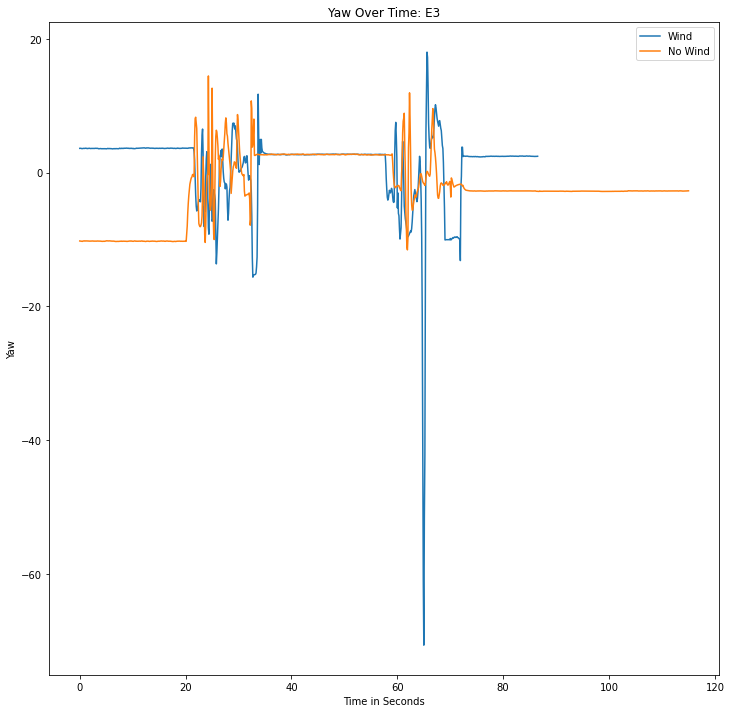

Standard Deviation of Yaw: Drone E3 with Wind
6.1074741010924525
Standard Deviation of Yaw: Drone E3 with NO Wind
4.706410819159685


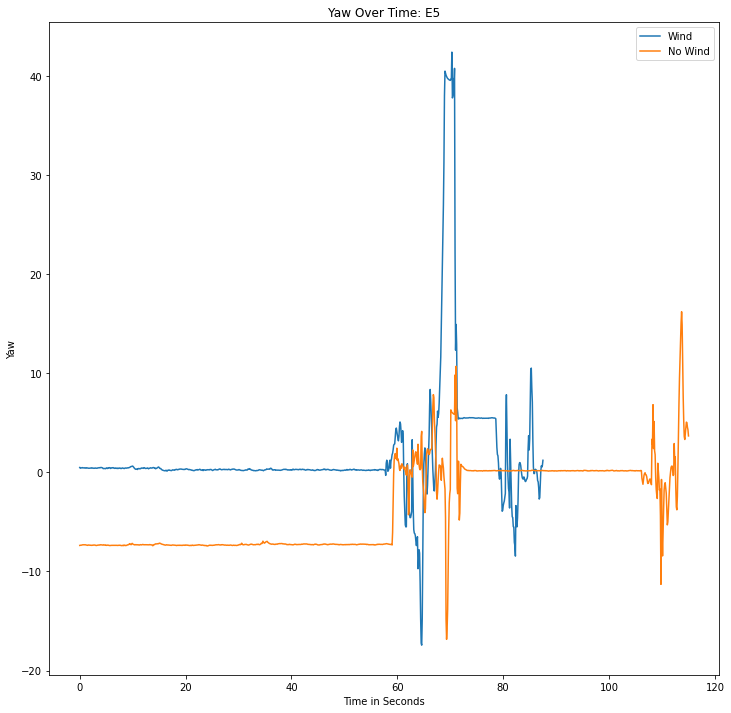

Standard Deviation of Drone E5 with Wind
6.738414680702391
Standard Deviation of Drone E5 with NO Wind
4.288954583550042


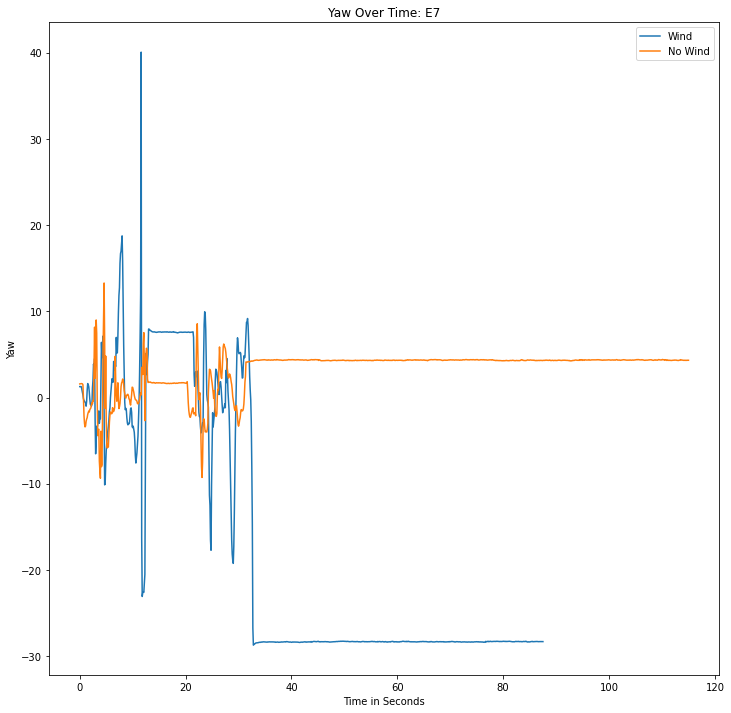

Standard Deviation of Drone E7 with Wind
15.244461935845518
Standard Deviation of Drone E7 with NO Wind
2.338311993180275


In [774]:
# ---------------------------------------------------------------------------
# --------------------------YAW FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------
# Yaw may not be so relevant as the drone would remain level when changing yaw so doesn't indicate instability necessarily.
# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------
print("NOTE: Yaw does not necessarily indicate instability. It is a measurement of the drone turning parallel to the ground.")

yaw_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE3)
yaw_timeE3.legend(["Wind", "No Wind"])
yaw_timeE3.set_title("Yaw Over Time: E3")
yaw_timeE3.set_xlabel("Time in Seconds")
yaw_timeE3.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Yaw: Drone E3 with Wind")
print(dataE3["stabilizer.yaw"].std())
print("Standard Deviation of Yaw: Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.yaw"].std())


# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

yaw_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE5)
yaw_timeE5.legend(["Wind", "No Wind"])
yaw_timeE5.set_title("Yaw Over Time: E5")
yaw_timeE5.set_xlabel("Time in Seconds")
yaw_timeE5.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.yaw"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.yaw"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

yaw_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE7)
yaw_timeE7.legend(["Wind", "No Wind"])
yaw_timeE7.set_title("Yaw Over Time: E7")
yaw_timeE7.set_xlabel("Time in Seconds")
yaw_timeE7.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.yaw"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.yaw"].std())


- Possibly do a wind speed vs stasndard deviation of pitch, roll, and yaw as a scatter plot across all data? Shows correlation between increased wind speed and lack of stability in drone?
- Show that the line of best fit of the voltage has a steeper gradient on drones with a wind speed of 2 vs 1, and 1 vs none?
- Visualise waiting times of the three drones? How does w


Balsam & Babar
- Different wind speeds: voltage change with different wind speeds. 1 drone across different wind speeds see voltage change.
        - Does wind speed increase the waiting time of the drones?
        - Does wind speed impact voltage?
        - Maybe find the gradients of when the drones are flying. Cut off data above a certain voltage value because that means it is charging or not flying. Find the average of the gradients for different wind speeds, broken down into differnet angles
- Different wind directions impact voltage.
        - How do different wind directions impact voltage
Same flight path:
3 wind speeds
many different angles??


- drones with logner segments take longer takes more time to charge with. two different tests. one with logner segment takes longer time. voltage should be teh same for both. try to ifnd one that both start with full batteries. charging time would be different depending on initial voltage. find two paths that start with same battery level, show that logner flight time takes longer to recharge. 
        - Compare same drone starting at same charge. One segment is longer than the other segment. 
        - same drone, same relative angle, same wind speed? Compare voltage recharge time. 
- normalise minimum and maximum 
what the effect for actual wind direciton, how wind direction. tail wind, head wind, side wiend. impact on voltage. 
- use an exponential line. 
- add labels for gradient line

in flight positionsal and energy use data set of a dji matrice 100 quadcopter for samll paackage delviery - scietnific data

- get an diea of if you can get more graphs from our dataset. more than the demo paper to a full paper. 
input would be initial volateg, wind speed, predict how much time it would take to recharge. 
predict availability of hte charging pad. predict how much tiem would it take to charge so we can have a proper estimation of the full flight time and 
- how initial voltage, wind, distance, multiple factors that will be used as input to predict thea ctual charging time. how many drones are trying take a certain node. 

you choose distane to not make htem collide and not too far apart. we don't want to prove the actual rate is the same. drones in a certianp osition are consuming 
shapes that are not symmetrical do 4 wind directions

